##Installing dependencies


In [ ]:
!pip install kaggle

In [ ]:
!pip install keras

In [ ]:
!pip install --upgrade tensorflow

#Importing and managing datasets

In [1]:
!mkdir ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p '/content/New Plant Diseases Dataset(Augmented)'

100% 2.70G/2.70G [02:03<00:00, 25.0MB/s]
100% 2.70G/2.70G [02:03<00:00, 23.5MB/s]


In [5]:
import zipfile

zip_file_path="/content/New Plant Diseases Dataset(Augmented)/new-plant-diseases-dataset.zip"
extract_path="/content/extracted plant disease dataset"

with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)


In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 



import os

import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import seaborn as sns




In [7]:
len(os.listdir('/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

#1st Model

#Data Preprocessing

In [8]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)


In [9]:
train=train_datagen.flow_from_directory(directory='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',target_size=(256,256),
                                        batch_size=32)
val=val_datagen.flow_from_directory(directory='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',target_size=(256,256),
                                        batch_size=32)

Found 70295 images belonging to 38 classes.
Found 70295 images belonging to 38 classes.


In [10]:
t_img,label=train.next()

In [11]:
def plotImage(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

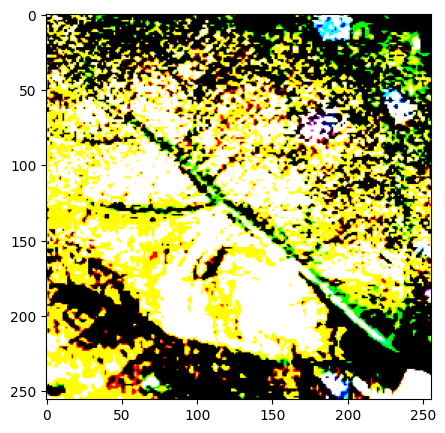

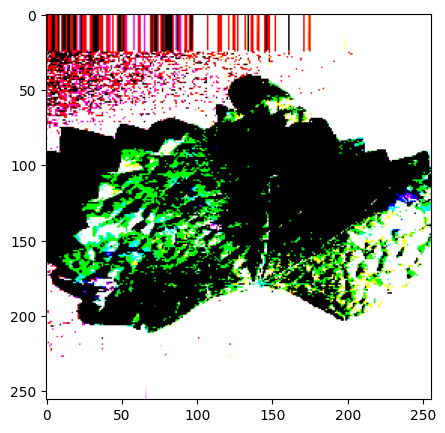

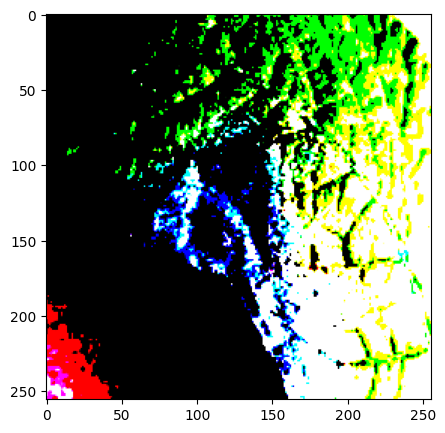

In [12]:
plotImage(t_img[:3],label[:3])

In [7]:
from keras.layers import Dense,Flatten
from keras.models import Model

In [14]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [15]:
for layer in base_model.layers:
  layer.trainable=False

In [16]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

#Creating model

In [17]:
X=Flatten()(base_model.output)
X=Dense(units=38,activation='softmax')(X)

# Creating our model

model=Model(base_model.input, X)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

#Model Training

In [19]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5,verbose=1)

mc=ModelCheckpoint(filepath='/content/best_model.h5',monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)

cb=[es,mc]

In [21]:
his=model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

<ipython-input-21-0259a9eb2680>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 27.1592 - accuracy: 0.1895
Epoch 1: val_accuracy improved from -inf to 0.41406, saving model to /content/best_model.h5
16/16 [==============================] - 28s 944ms/step - loss: 27.1592 - accuracy: 0.1895 - val_loss: 14.1996 - val_accuracy: 0.4141
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.3153 - accuracy: 0.4141
Epoch 2: val_accuracy improved from 0.41406 to 0.57617, saving model to /content/best_model.h5
16/16 [==============================] - 13s 808ms/step - loss: 14.3153 - accuracy: 0.4141 - val_loss: 9.4696 - val_accuracy: 0.5762
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 10.9214 - accuracy: 0.5566
Epoch 3: val_accuracy improved from 0.57617 to 0.68164, saving model to /content/best_model.h5
16/16 [==============================] - 15s 946ms/step - loss: 10.9214 - accuracy: 0.5566 - val_loss: 7.2464 - val_accuracy: 0.6816
Epoch 4/50
16/16 [===============

In [22]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

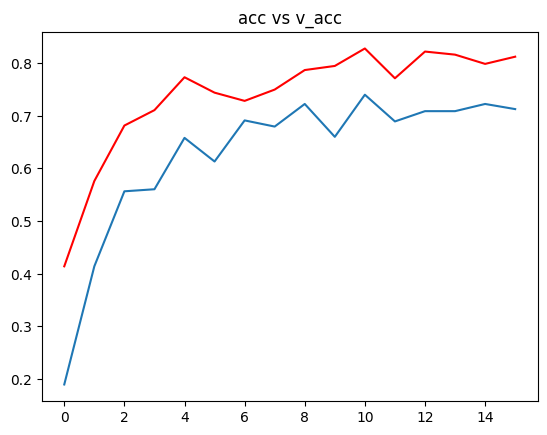

In [23]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v_acc')
plt.show()

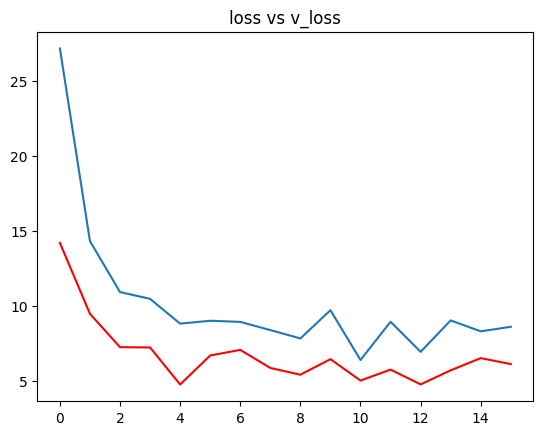

In [24]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs v_loss')
plt.show()

In [25]:
from keras.models import load_model

model=load_model('/content/best_model.h5')

In [26]:
acc=model.evaluate(val)[1]
print(f'The models accuracy is = {acc*100}%')

2197/2197 [==============================] - 452s 205ms/step - loss: 4.7543 - accuracy: 0.8206
The models accuracy is = 82.05846548080444%


In [27]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

#Model Testing


In [28]:
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  print(f'The image belongs to {ref[pred]}')

In [29]:
path='/content/extracted plant disease dataset/test/test/CornCommonRust2.JPG'
prediction(path)

1/1 [==============================] - 1s 806ms/step
The image belongs to Corn_(maize)___Common_rust_


#2nd model

#Importing Modules

In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization


In [9]:
import warnings
warnings.filterwarnings('ignore')
tensorflow.compat.v1.set_random_seed(0)
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from  sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

#Data Preprocessing

In [34]:
train_gen=image_dataset_from_directory(directory='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',image_size=(256,256))
test_gen=image_dataset_from_directory(directory='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',image_size=(256,256))

rescale=Rescaling(scale=1.0/255)
train_gen=train_gen.map(lambda image,label:(rescale(image),label))
test_gen=test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


#Modelling

In [35]:
model=Sequential()
# Layer 1
model.add(keras.layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(3,3))

# layer 2
model.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))

model.add(keras.layers.Conv2D(512,(5,5),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(512,(5,5),padding='same',activation='relu'))

model.add(Flatten())

model.add(Dense(1568,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(38,activation='softmax'))

In [36]:
opt=keras.optimizers.Adam(learning_rate=(0.0001))

model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [37]:
history=model.fit_generator(train_gen,validation_data=test_gen,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 382s 171ms/step - loss: 1.5821 - accuracy: 0.5375 - val_loss: 0.5602 - val_accuracy: 0.8227
Epoch 2/10
2197/2197 [==============================] - 375s 170ms/step - loss: 0.4507 - accuracy: 0.8576 - val_loss: 0.2526 - val_accuracy: 0.9199
Epoch 3/10
2197/2197 [==============================] - 356s 162ms/step - loss: 0.2645 - accuracy: 0.9142 - val_loss: 0.2326 - val_accuracy: 0.9252
Epoch 4/10
2197/2197 [==============================] - 356s 162ms/step - loss: 0.1825 - accuracy: 0.9403 - val_loss: 0.1778 - val_accuracy: 0.9425
Epoch 5/10
2197/2197 [==============================] - 372s 169ms/step - loss: 0.1340 - accuracy: 0.9556 - val_loss: 0.1646 - val_accuracy: 0.9464
Epoch 6/10
2197/2197 [==============================] - 370s 168ms/step - loss: 0.1031 - accuracy: 0.9658 - val_loss: 0.1354 - val_accuracy: 0.9575
Epoch 7/10
2197/2197 [==============================] - 371s 169ms/step - loss: 0.0827 - accuracy: 0.9727 - val_

#Visualization

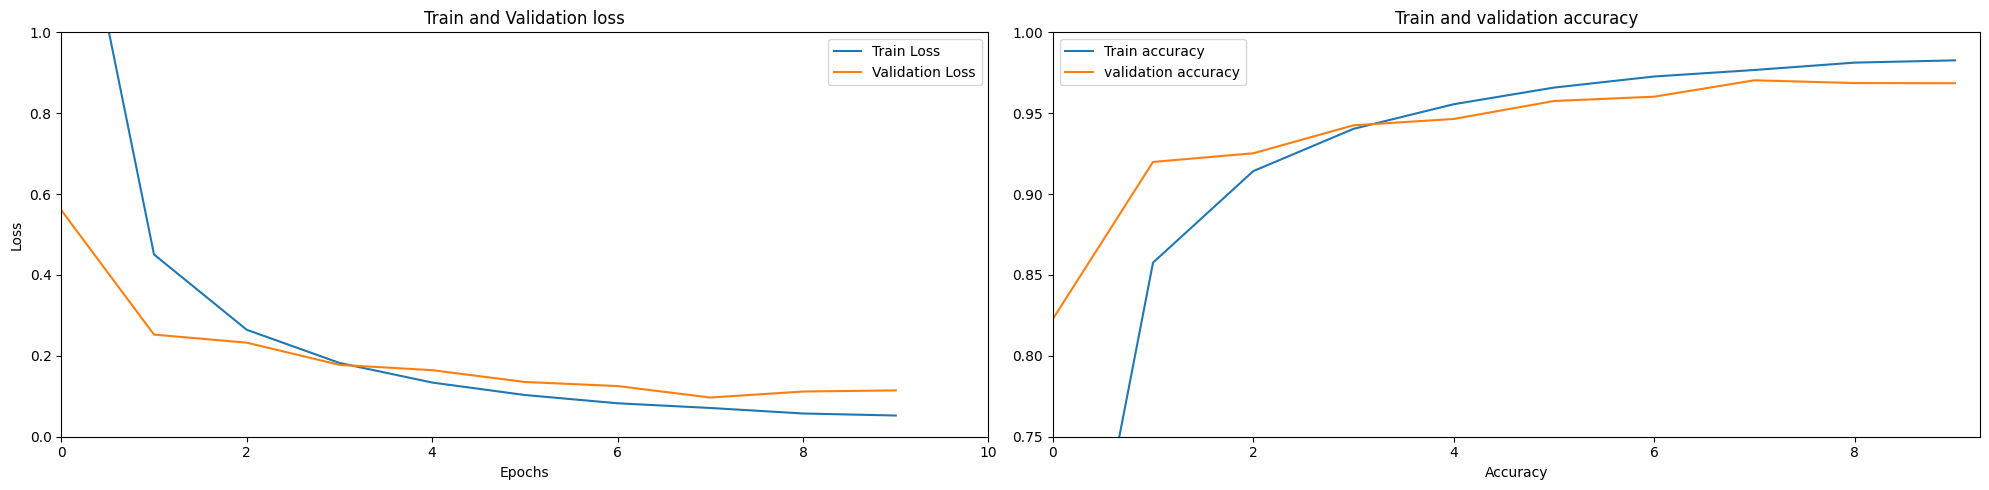

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Train and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlim(0,10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlim(0,9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels=[]
predictions=[]
for x,y in test_gen:
  labels.append(list(y.numpy()))
  predictions.append(tensorflow.argmax(model.predict(x),1).numpy())

In [42]:
predictions=list(itertools.chain.from_iterable(predictions))
labels=list(itertools.chain.from_iterable(labels))

In [44]:
print("Train accuracy:{:.2f}%".format(history.history['accuracy'][-1]*100))
print("Test accuracy:{:.2f}%".format(accuracy_score(labels,predictions)*100))
print("Recall Score:{:.2f}%".format(recall_score(labels,predictions,average='micro')*100))
print("Precision Score:{:.2f}%".format(precision_score(labels,predictions,average='micro')*100))

Train accuracy:98.27%
Test accuracy:96.85%
Recall Score:96.85%
Precision Score:96.85%


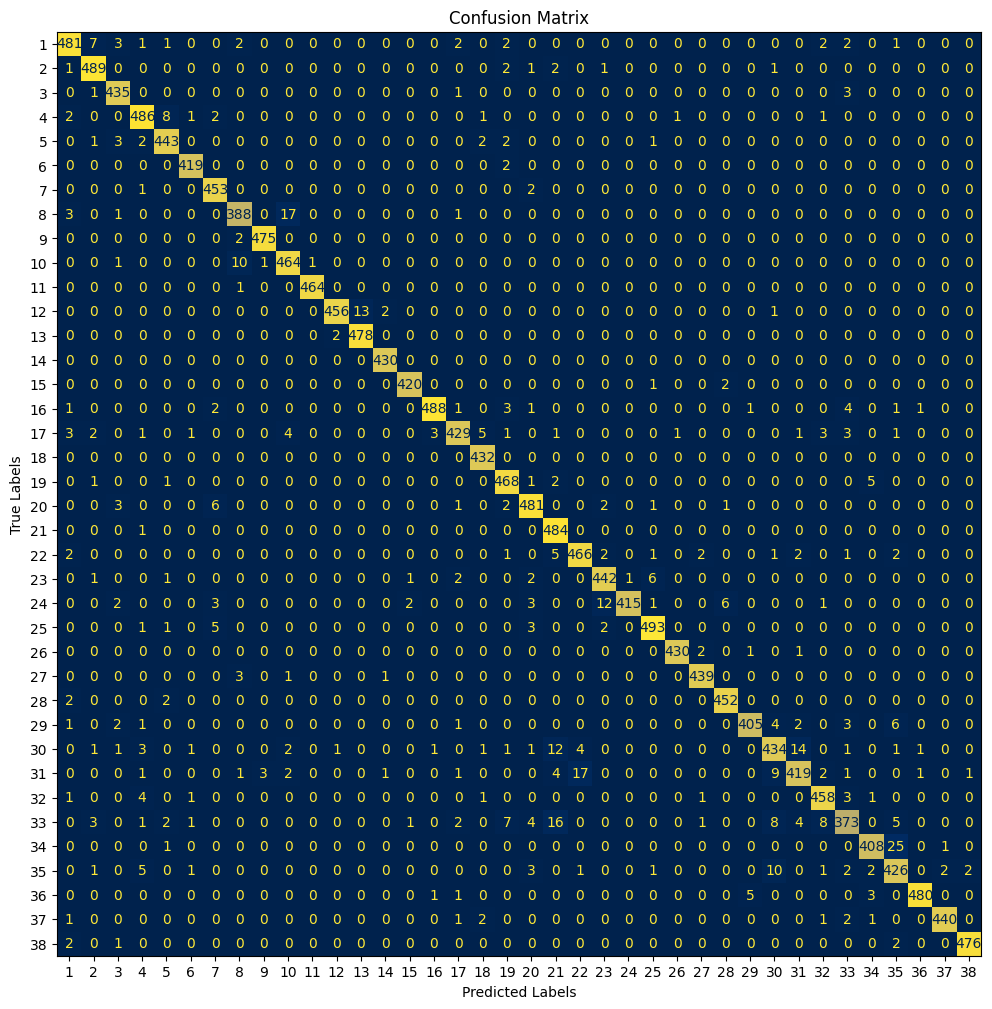

In [68]:
# plt.figure(figsize=(20,5))
cm=confusion_matrix(labels,predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(range(1,39)))
fig,ax=plt.subplots(figsize=(13,12))
disp.plot(ax=ax,colorbar=False,cmap='cividis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#3rd Model

##Importing modules

In [18]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
import cv2

In [11]:
image_path='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [12]:
train_path='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

valid_path='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

test_path='/content/extracted plant disease dataset/test'

#Visualize Images

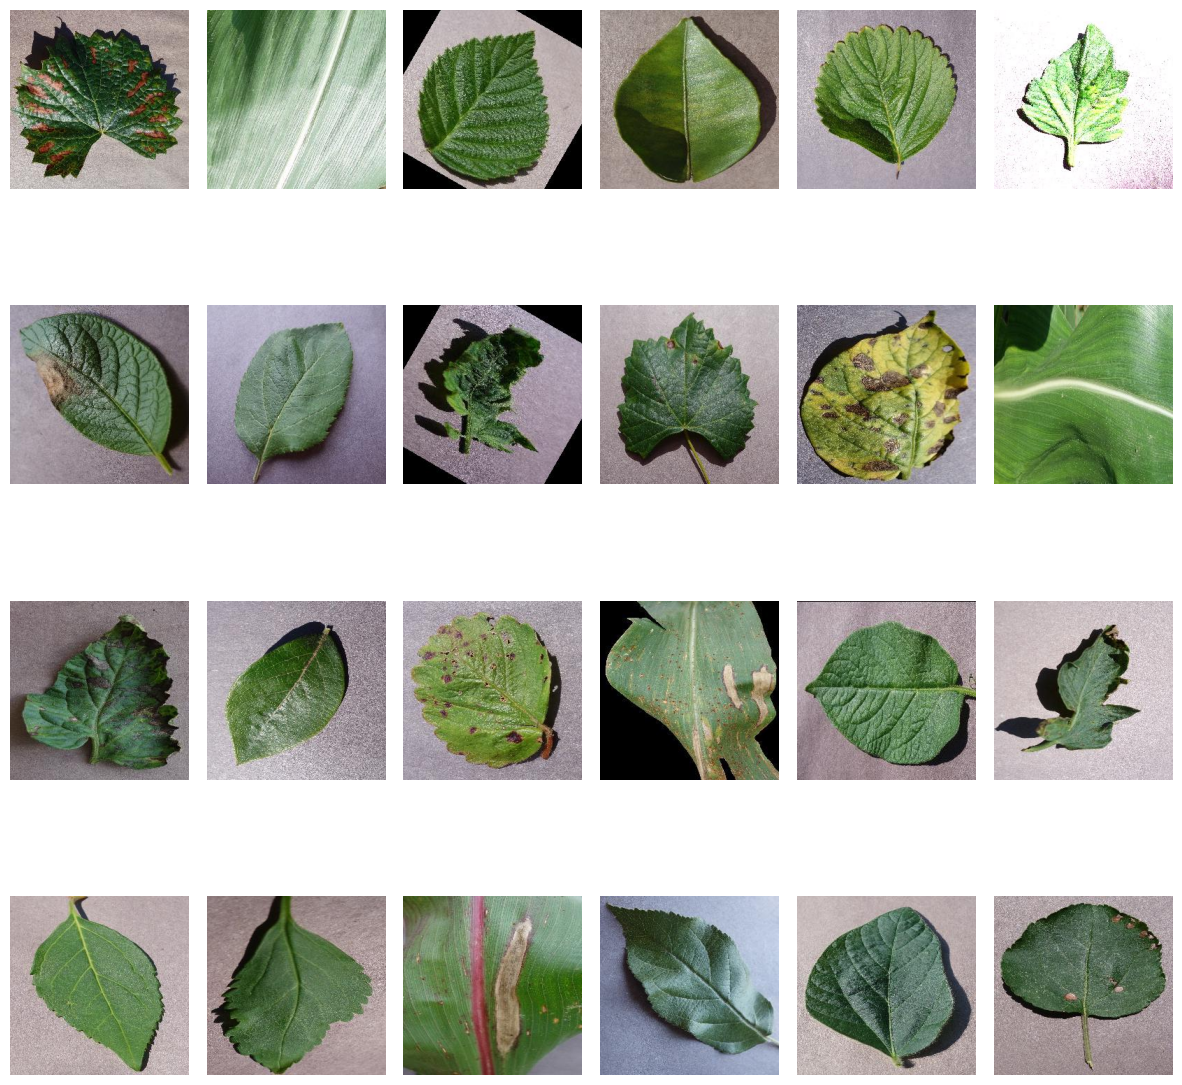

In [19]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1,hspace=0.1)

for i in range(24):
  random_folder=np.random.randint(0,len(os.listdir(image_path)))
  random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
  random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
  random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])

  image=cv2.imread(random_image_path)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.subplot(4,6,i+1)
  plt.imshow(image)
  plt.axis('off')
plt.show()

In [25]:
class_names=os.listdir(image_path)

In [26]:
print('Number of classes: {} '.format(len(class_names)))

Number of classes: 38 


Number of images in each class

In [28]:
number_of_images={}
for class_name in class_names:
  number_of_images[class_name]=len(os.listdir(image_path+'/'+class_name))
images_each_class=pd.DataFrame(list(number_of_images.items()),columns=['Class Name','Number of Images'])

images_each_class

,Class Name,Number of Images
0,Strawberry___Leaf_scorch,1774
1,Potato___Late_blight,1939
2,"Pepper,_bell___healthy",1988
3,Grape___Esca_(Black_Measles),1920
4,Peach___Bacterial_spot,1838
5,Blueberry___healthy,1816
6,Strawberry___healthy,1824
7,"Pepper,_bell___Bacterial_spot",1913
8,Tomato___Bacterial_spot,1702
9,Corn_(maize)___healthy,1859


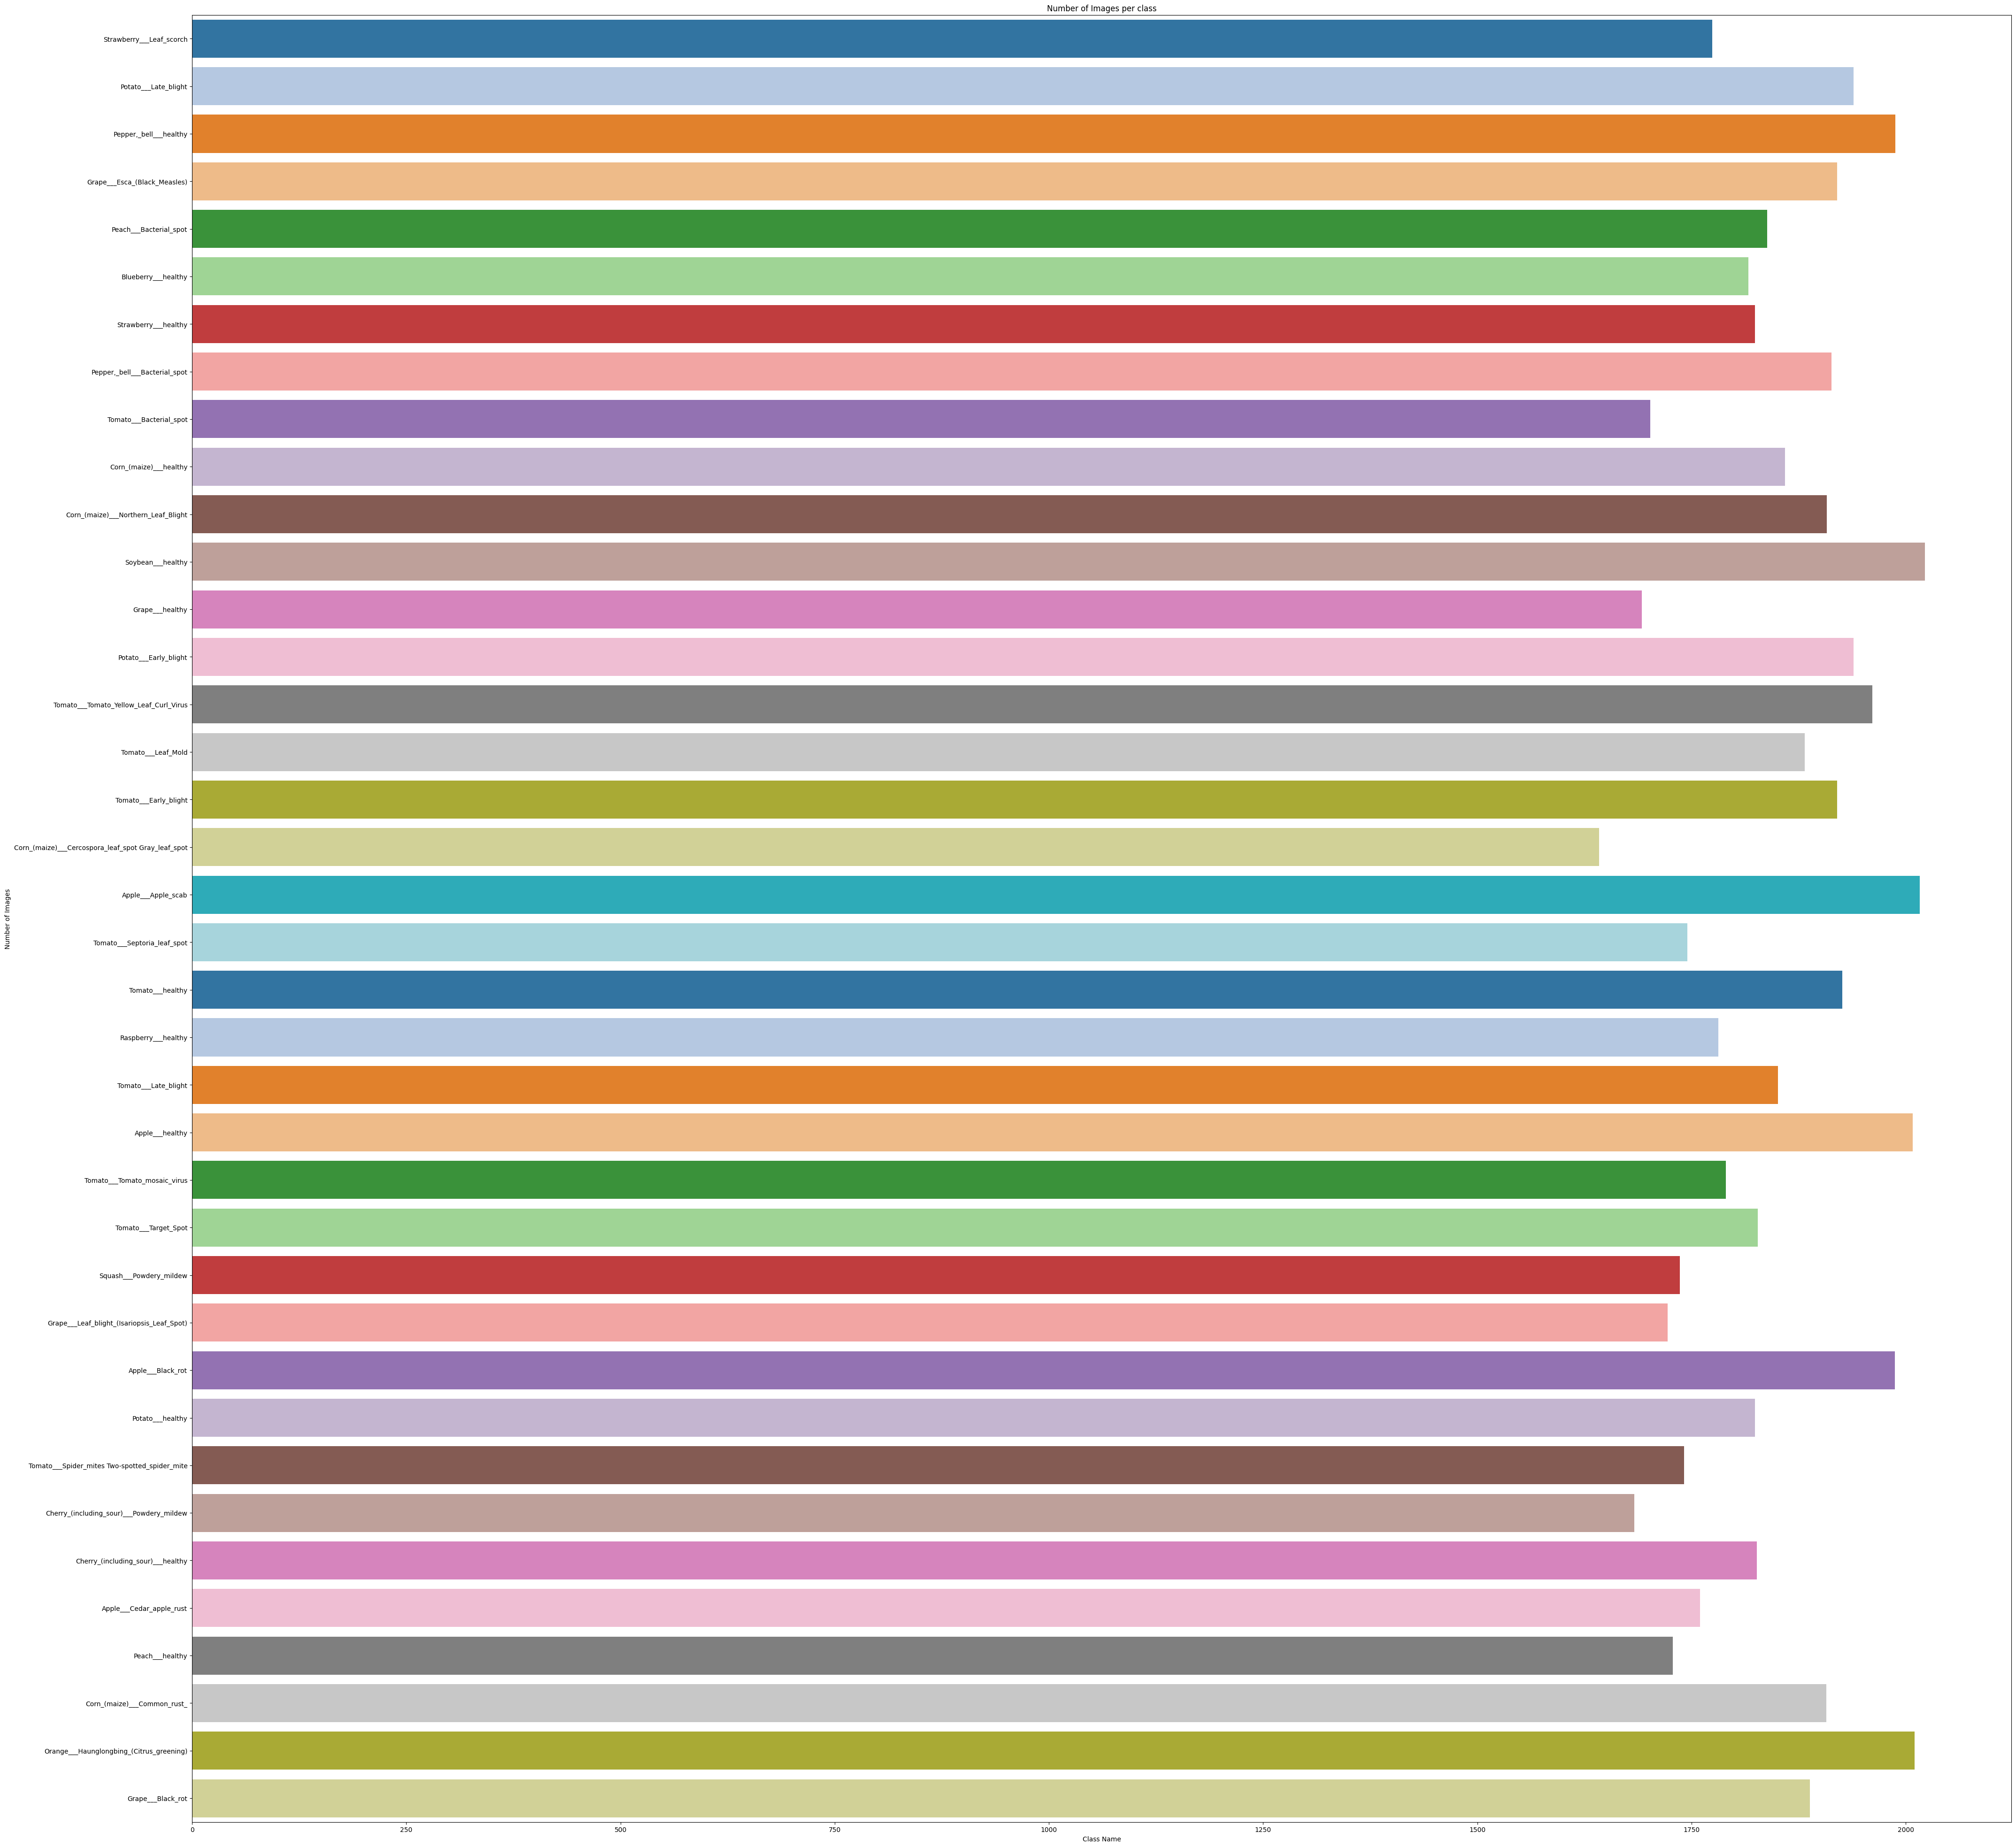

In [38]:
plt.figure(figsize=(50,50))
sns.barplot(y='Class Name',x='Number of Images',data=images_each_class,palette='tab20')
plt.title('Number of Images per class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

In [61]:
batch_size=64

In [42]:
train_datagenerator=ImageDataGenerator(rescale=1.0/255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True,validation_split=0.2,fill_mode='nearest')

In [43]:
validdata_generator=ImageDataGenerator(rescale=1.0/255)
testdata_generator=ImageDataGenerator(rescale=1.0/255)

In [49]:
train_data_generator=train_datagenerator.flow_from_directory(train_path,batch_size=batch_size,class_mode='categorical',target_size=(256,256),color_mode='rgb',shuffle=True)
valid_data_generator=validdata_generator.flow_from_directory(train_path,batch_size=batch_size,class_mode='categorical',target_size=(256,256),color_mode='rgb',shuffle=True)

Found 70295 images belonging to 38 classes.
Found 70295 images belonging to 38 classes.


In [50]:
test_data_generator=testdata_generator.flow_from_directory(valid_path,batch_size=batch_size,class_mode='categorical',target_size=(256,256),color_mode='rgb',shuffle=False)

Found 17572 images belonging to 38 classes.


In [51]:
train_number=train_data_generator.samples
valid_number=valid_data_generator.samples

#Create MobileNetV2 Model

In [53]:
mobilenetV2_model=keras.applications.MobileNetV2(weights='imagenet',classes=38,include_top=False,input_shape=(256,256,3))
x=mobilenetV2_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)
prediction=Dense(38,activation='softmax')(x)
model=Model(inputs=mobilenetV2_model.input,outputs=prediction)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                               

In [55]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [59]:
callback=EarlyStopping(monitor='val_loss',mode='max',verbose=1,patience=4,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [63]:
history=model.fit(train_data_generator,steps_per_epoch=16,validation_data=valid_data_generator,validation_steps=16,shuffle=True,epochs=12,batch_size=64,callbacks=[callback])

Epoch 1/12
16/16 [==============================] - 189s 13s/step - loss: 0.1091 - accuracy: 0.9625 - val_loss: 1.2819 - val_accuracy: 0.7549
Epoch 2/12
16/16 [==============================] - 190s 13s/step - loss: 0.1193 - accuracy: 0.9719 - val_loss: 0.5281 - val_accuracy: 0.8744
Epoch 3/12
16/16 [==============================] - 207s 14s/step - loss: 0.1086 - accuracy: 0.9625 - val_loss: 0.5500 - val_accuracy: 0.8710
Epoch 4/12
16/16 [==============================] - 207s 14s/step - loss: 0.0902 - accuracy: 0.9688 - val_loss: 0.9005 - val_accuracy: 0.8135
Epoch 5/12
16/16 [==============================] - 195s 13s/step - loss: 0.2024 - accuracy: 0.9344 - val_loss: 1.2079 - val_accuracy: 0.7807
Epoch 5: early stopping


In [1]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'],marker='*',linestyle='--',color='yellow',markersize=9,lw=4)
plt.plot(history.history['val_accuracy'],marker='D',linestyle='-.',color='blue',markersize=9,lw=4)
plt.title('Train accuracy vs Validation accuracy',color='pink',fontsize=20)
plt.ylabel('Accuracy',color='lavender',fontsize=15)
plt.xlabel('Epoch',color='lavender',fontsize=15)
plt.legend(['Train_Accuracy',"Test_Accuracy"],loc='upper left')
plt.show()


NameError: ignored